# Importing python Libraries......
1. linear algebra
2. Pandas
3. OpenCv
4. Os

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

# Showing Labels From Drirectory/dataset

In [2]:


labels = os.listdir("../input/driver-eye-activity-monitoring-dataset/train")

labels

['Closed', 'Open', 'yawn', 'no_yawn']

# Importing matplotlib And Showing Closed Eye image....

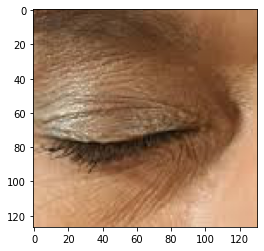

In [3]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/driver-eye-activity-monitoring-dataset/train/Closed/_10.jpg"))



# Reading yes_Yawn image

In [4]:
a = plt.imread("../input/driver-eye-activity-monitoring-dataset/train/yawn/101.jpg")

In [5]:
a.shape

(480, 640, 3)

# Showing image with yes_yawn

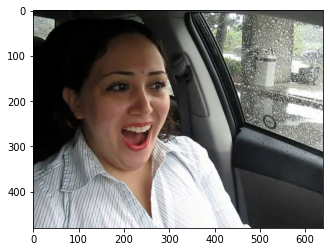

In [6]:
plt.imshow(plt.imread("../input/driver-eye-activity-monitoring-dataset/train/yawn/101.jpg"))

# Function For Yawn Detection

In [7]:
def face_for_yawn(direc="../input/driver-eye-activity-monitoring-dataset/train", face_cas_path="../input/predictions-dataset/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# Function For Closed And Open Eyes....

In [8]:
def get_data(dir_path="../input/driver-eye-activity-monitoring-dataset/train", face_cas="../input/predictions-dataset/haarcascade_frontalface_default.xml", eye_cas="../input/predictions-dataset/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [9]:
data_train = get_data()

2
3


# Extend data and converting it to array

In [10]:
def append_data():
#     total_data = []
    yawn_no = face_for_yawn()
    data = get_data()
    yawn_no.extend(data)
    return np.array(yawn_no)

In [11]:
new_data = append_data()

0
1
2
3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


# Separate label and features

In [12]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# Reshapping The Array

In [13]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

#  Importing LabelBinarizer

In [14]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)

# Tarining, Testing, Spliting The Dataset

In [15]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# X_Test Length

In [16]:
len(X_test)

578

# Importing Tensorflow dependencies

In [17]:

# import some dependencies

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# TensorFlow Version

In [18]:
# tensorflow version

tf.__version__

'2.6.4'

# Data Augmentation

In [19]:

train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

In [20]:
train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model 

In [21]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

2022-06-12 13:50:13.888372: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))


2022-06-12 13:50:14.301743: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
43/43 [==============================] - 182s 4s/step - loss: 1.1127 - accuracy: 0.5174 - val_loss: 0.5361 - val_accuracy: 0.7716
Epoch 2/10
43/43 [==============================] - 182s 4s/step - loss: 0.5868 - accuracy: 0.7572 - val_loss: 0.4147 - val_accuracy: 0.7976
Epoch 3/10
43/43 [==============================] - 182s 4s/step - loss: 0.4133 - accuracy: 0.8174 - val_loss: 0.3611 - val_accuracy: 0.8754
Epoch 4/10
43/43 [==============================] - 184s 4s/step - loss: 0.3869 - accuracy: 0.8337 - val_loss: 0.3034 - val_accuracy: 0.8858
Epoch 5/10
43/43 [==============================] - 182s 4s/step - loss: 0.3177 - accuracy: 0.8693 - val_loss: 0.2251 - val_accuracy: 0.9256
Epoch 6/10
43/43 [==============================] - 184s 4s/step - loss: 0.2827 - accuracy: 0.8827 - val_loss: 0.2231 - val_accuracy: 0.9135
Epoch 7/10
43/43 [==============================] - 185s 4s/step - loss: 0.2361 - accuracy: 0.9072 - val_loss: 0.2303 - val_accuracy: 0.9066
Epoch 8/10
43

# History.... Training Acc, Training Loss.....

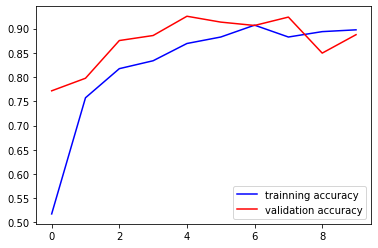

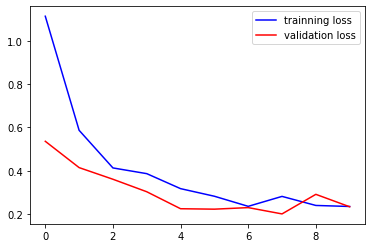

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# Saving Model

In [24]:
model.save("Activeness_Alert5.h5")

In [25]:
model.save("Activeness_Alert5.model")

2022-06-12 14:22:53.635462: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [26]:
# prediction = model.predict_classes(X_test)
prediction =model.predict(X_test) 


In [27]:
prediction

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [28]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

#  Predicting images function

In [29]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/predictions-dataset/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./Activeness_Alert5.h5")

# Prediction
#  0-yawn, 1-no_yawn, 2-Closed, 3-Open**

In [30]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/driver-eye-activity-monitoring-dataset/train/no_yawn/1030.jpg")])
np.argmax(prediction)

2

In [31]:
prediction = model.predict([prepare("../input/driver-eye-activity-monitoring-dataset/train/Closed/_103.jpg")])
np.argmax(prediction)

2

In [32]:
prediction = model.predict([prepare("../input/driver-eye-activity-monitoring-dataset/train/Open/_104.jpg")])
np.argmax(prediction)

3

In [33]:
prediction = model.predict([prepare("../input/driver-eye-activity-monitoring-dataset/train/yawn/106.jpg")])
np.argmax(prediction)

3

# If You Like it plz Upvote

# Ahmed Ali